In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uniform_horizon_dir = "../data/outputs/lift_lowdim_ph_reproduction/horizon_16/2025.03.11/10.57.22_train_diffusion_unet_lowdim_lift_lowdim_transformer_128/uniform_horizon_jumpying_disturbance"

In [3]:
success_rate_lst = list()
for horizon in range(1, 13):
    py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025_50episodes", "eval_log.json")))
    success_rate_lst.append(py_data["test/mean_score"])
success_rate_lst = np.array(success_rate_lst)

In [4]:
len(success_rate_lst)

12

In [5]:
print(success_rate_lst)

[0.56 0.78 0.78 0.74 0.82 0.68 0.82 0.64 0.62 0.5  0.7  0.6 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


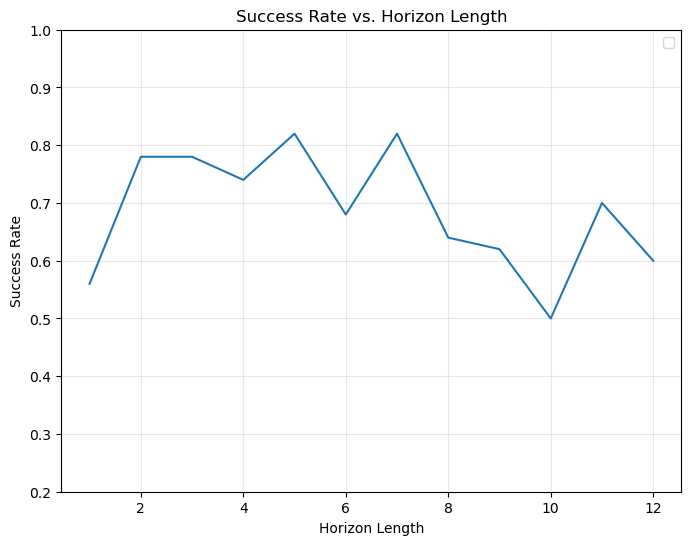

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(np.arange(1, len(success_rate_lst)+1), success_rate_lst)
ax1.set_ylim(.2, 1)
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()

In [8]:
seed_lst = np.concatenate([np.arange(100000, 100020), np.arange(100025, 100031)])

In [9]:
# Calculate averages and std for each bin
def get_binned_statistics(horizon_times, success, bins):
    bin_indices = np.digitize(horizon_times, bins)
    binned_success_rate = []
    bin_centers = []
    bin_counts = []
    for i in range(min(bin_indices), max(bin_indices)+1):
        mask = bin_indices == i
        if np.any(np.logical_and(mask, success)):
            bin_centers.append((bins[i-1] + bins[i]) / 2)
            binned_success_rate.append(np.mean(success[mask]))
            bin_counts.append(np.sum(mask))
        else:
            binned_success_rate.append(0)
            bin_counts.append(0)
            bin_centers.append((bins[i-1] + bins[i]) / 2)
    
    return np.array(bin_centers), np.array(binned_success_rate), bin_counts

In [10]:
AHC_horizon_dir = "../data/outputs/lift_lowdim_ph_reproduction/horizon_16/2025.03.11/10.57.22_train_diffusion_unet_lowdim_lift_lowdim_transformer_128/eval_AHC_disturbance_by_seed"
AHC_horizon_success_rate_lst = list()
for seed in seed_lst:
    for horizon in range(1, 14):
        py_data = json.load(open(os.path.join(AHC_horizon_dir, f"eval_AHC_seed_{seed}_jumping_disturbance_num_distrub_1_pos_0.03_gripper_dir_near_gripper_0.025", "eval_log.json")))
        
        if py_data[f"test/sim_action_horizon_average_length_{horizon}"] != -1:
            AHC_horizon_success_rate_lst.append(
                np.array([
                    py_data[f"test/sim_action_horizon_average_length_{horizon}"],
                    py_data[f"test/sim_max_reward_{horizon}"]
                ])
            )
AHC_horizon_success_rate_lst = np.array(AHC_horizon_success_rate_lst)
print(AHC_horizon_success_rate_lst.shape)


(323, 2)


In [11]:
bins = np.arange(0.5, 14.5, 1)
print(bins)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5]


In [12]:
AHC_bin_centers, AHC_binned_success_rate, AHC_bin_counts = get_binned_statistics(AHC_horizon_success_rate_lst[:, 0], AHC_horizon_success_rate_lst[:, 1], bins)

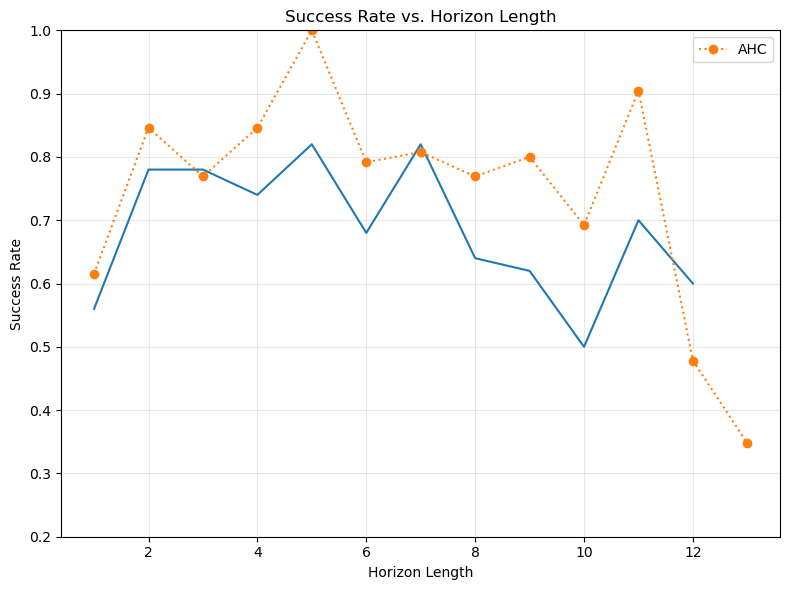

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(np.arange(1, len(success_rate_lst)+1), success_rate_lst)
ax1.plot(AHC_bin_centers, AHC_binned_success_rate, 'o:', color='tab:orange', label='AHC')
ax1.set_ylim(.2, 1)
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

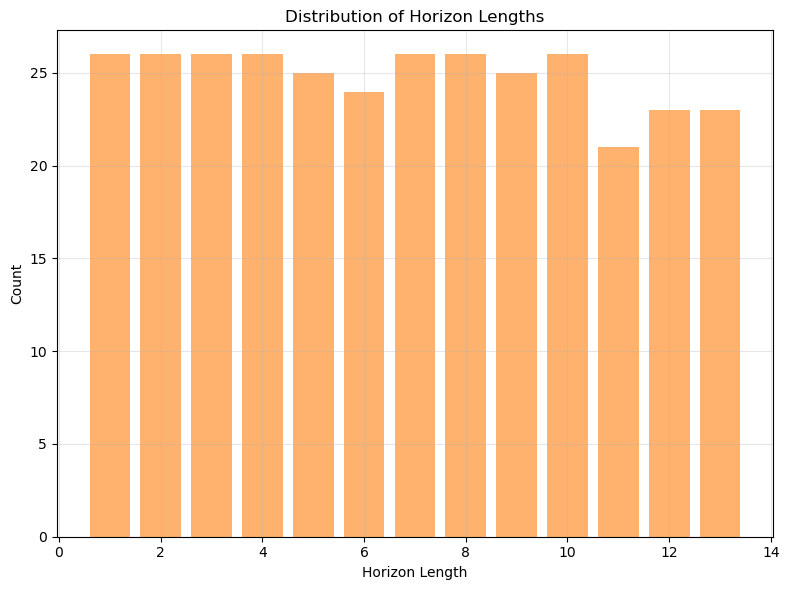

In [15]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(AHC_bin_centers, AHC_bin_counts, alpha=0.6, color='tab:orange')
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Bin Counts')
ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
